In [1]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import linear_model
from PyPDF2 import PdfFileMerger, PdfFileReader
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus']=False #用来正常显示负号
%matplotlib inline

In [2]:
data = pd.read_table('slope_data.txt',sep = '\t')
data.head()

,No,x,y
0,1,1.0,1.123000
1,1,2.0,0.561500
2,1,3.0,0.374333
3,1,4.0,0.280750
4,1,5.0,0.224600


In [3]:
data.No = data.No.astype(int)

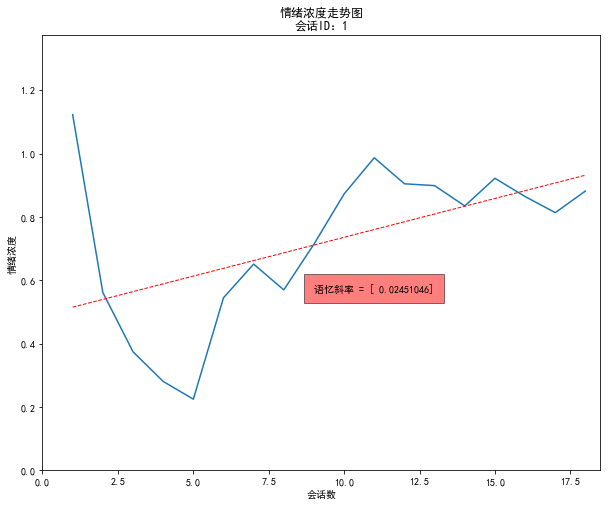

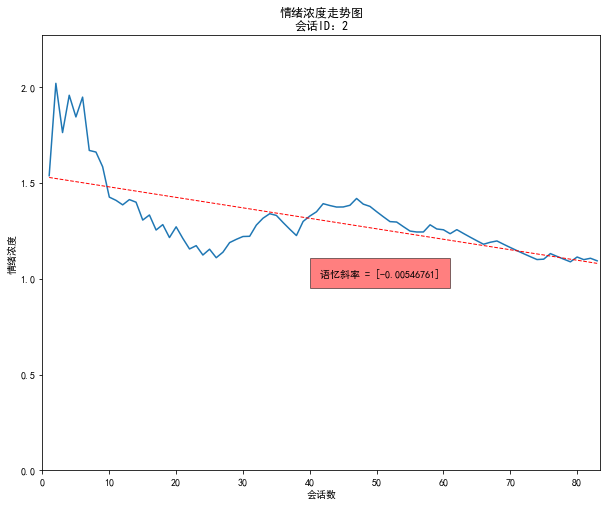

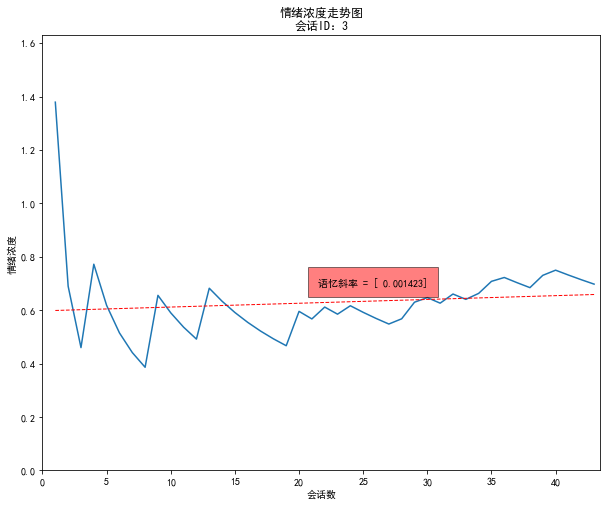

In [5]:
grouped = data.groupby('No')
count = 0
for name, group in grouped:
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111)
    df2plot = group.set_index('x')['y']
    df2plot.plot(ax = ax)
    regr = linear_model.LinearRegression()
    regr.fit(group['x'].values.reshape(-1, 1), group['y'])
    a, b = regr.coef_, regr.intercept_
    plt.plot(group['x'],regr.predict(group['x'].values.reshape(-1,1)),'r--',linewidth = 1)
    ax.set_xlabel("会话数")
    ax.set_ylabel("情绪浓度")
#     print(group['y'].shape)
    ax.set_xlim(0,max(group['x']) + 0.5)
    ax.set_ylim(0,max(group['y'])+ 0.25)
    ax.set_title("情绪浓度走势图"+"\n" + "会话ID：%s" % name)
    ax.text(max(group['x']/2), max(group['y']/2), '语忆斜率 = %s'% a, style='italic',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
    #plt.show()
    plt.savefig("对话id_%s情绪走势图.pdf" % name) 
    #plt.close()
    count +=1
    if count == 3: break

In [ ]:
merger = PdfFileMerger()
filenames = ["对话id_%s情绪走势图.pdf" % i for i in range(1,636)]
for filename in filenames:
    try:
        merger.append(filename)
    except FileNotFoundError:
        pass
    
merger.write("对话情绪走势图.pdf")